**TATA** **Motors** **Historical** **Data**

---
Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.


In [83]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [84]:
#read csv file
data = pd.read_csv("/content/drive/MyDrive/TataMotors_historical_data (1).csv")
data

,Date,Open,High,Low,Close,Volume
0,2022-08-01T09:15:00+05:30,451.95,454.00,451.05,453.40,297050
1,2022-08-01T09:16:00+05:30,453.55,454.80,453.40,454.35,171898
2,2022-08-01T09:17:00+05:30,454.30,454.50,453.35,453.35,183982
3,2022-08-01T09:18:00+05:30,453.30,453.70,452.70,453.35,178678
4,2022-08-01T09:19:00+05:30,453.30,453.90,453.05,453.75,106322
...,...,...,...,...,...,...
92245,2023-07-31T15:25:00+05:30,644.80,644.80,644.15,644.15,19116
92246,2023-07-31T15:26:00+05:30,644.35,644.70,644.15,644.70,22111
92247,2023-07-31T15:27:00+05:30,644.70,644.70,644.35,644.40,24553
92248,2023-07-31T15:28:00+05:30,644.40,644.65,642.90,644.00,67930


# ***Data*** ***Overview***

In [85]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2022-08-01T09:15:00+05:30,451.95,454.0,451.05,453.40,297050
1,2022-08-01T09:16:00+05:30,453.55,454.8,453.40,454.35,171898
2,2022-08-01T09:17:00+05:30,454.30,454.5,453.35,453.35,183982
3,2022-08-01T09:18:00+05:30,453.30,453.7,452.70,453.35,178678
4,2022-08-01T09:19:00+05:30,453.30,453.9,453.05,453.75,106322


In [86]:
data.tail()

,Date,Open,High,Low,Close,Volume
92245,2023-07-31T15:25:00+05:30,644.80,644.80,644.15,644.15,19116
92246,2023-07-31T15:26:00+05:30,644.35,644.70,644.15,644.70,22111
92247,2023-07-31T15:27:00+05:30,644.70,644.70,644.35,644.40,24553
92248,2023-07-31T15:28:00+05:30,644.40,644.65,642.90,644.00,67930
92249,2023-07-31T15:29:00+05:30,644.10,644.35,643.50,644.30,19748


In [87]:
data.describe()

,Open,High,Low,Close,Volume
count,92250.000000,92250.000000,92250.000000,92250.000000,9.225000e+04
mean,465.340370,465.548920,465.118309,465.339905,3.571487e+04
std,67.384109,67.404781,67.361545,67.385887,6.194051e+04
min,375.350000,377.500000,375.200000,376.250000,5.900000e+02
25%,417.100000,417.300000,416.900000,417.100000,1.103100e+04
50%,439.600000,439.800000,439.400000,439.600000,2.025000e+04
75%,485.437500,485.650000,485.150000,485.400000,3.966100e+04
max,660.200000,663.100000,658.000000,660.100000,4.094982e+06


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92250 entries, 0 to 92249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    92250 non-null  object 
 1   Open    92250 non-null  float64
 2   High    92250 non-null  float64
 3   Low     92250 non-null  float64
 4   Close   92250 non-null  float64
 5   Volume  92250 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.2+ MB


In [89]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [90]:
data.shape

(92250, 6)

# ***Data*** ***Information***

---
We have 92250 rows and 6 columns in our dataset with no null values. Here our dependent variable will be *Close*, and independent variables are - *Open, High, Low and Volume*.

* **Date:**  It denotes the month, year and time of the data for a particular price.
* **Open:**  Open means the price at which a stock started trading at that date.
* **High:**  Refers to the maximum price at that date.
* **Low:**   Refers to the minimum price at that date.
* **Close:** Refers to the final trading price for that date, which we have to predict using regression.
* **Volume**: The total number of shares (or contracts) traded during at that time.


In [91]:
#copying data to preserve orignal file
data1= data.copy()
data1

,Date,Open,High,Low,Close,Volume
0,2022-08-01T09:15:00+05:30,451.95,454.00,451.05,453.40,297050
1,2022-08-01T09:16:00+05:30,453.55,454.80,453.40,454.35,171898
2,2022-08-01T09:17:00+05:30,454.30,454.50,453.35,453.35,183982
3,2022-08-01T09:18:00+05:30,453.30,453.70,452.70,453.35,178678
4,2022-08-01T09:19:00+05:30,453.30,453.90,453.05,453.75,106322
...,...,...,...,...,...,...
92245,2023-07-31T15:25:00+05:30,644.80,644.80,644.15,644.15,19116
92246,2023-07-31T15:26:00+05:30,644.35,644.70,644.15,644.70,22111
92247,2023-07-31T15:27:00+05:30,644.70,644.70,644.35,644.40,24553
92248,2023-07-31T15:28:00+05:30,644.40,644.65,642.90,644.00,67930


# ***EDA*** ***and*** ***Data*** ***Preprocessing***

In [92]:
indep_var=data1[['High','Low','Open','Volume']]
dep_var=data1['Close']

**Handling** **Date**

---
Instead of dropping the date, we will convert it into the proper format and use it as an index.


In [93]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
data1['Date'] = pd.to_datetime(data1['Date'])

In [94]:
#set date as index
data1.set_index('Date', inplace=True)
data1.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01 09:15:00+05:30,451.95,454.0,451.05,453.4,297050


**Check** **and** **Handle** **Duplicates**

In [95]:
len(data1[data1.duplicated()])

0

# ***Univariate*** ***Analysis***

We will take a look at distribution plots of our features.



**Independent** **Variables**

<ipython-input-96-12d3b36f6847>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data1[var].dropna())
<ipython-input-96-12d3b36f6847>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data1[var].dropna())
<ipython-input-96-12d3b36f6847>:5: UserWarning: 

`distplot` is a deprecated fun

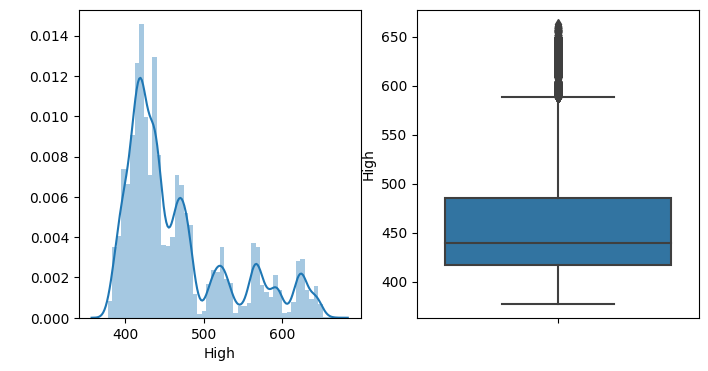

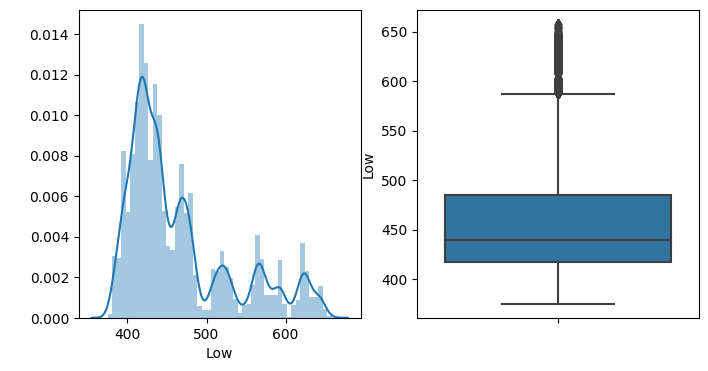

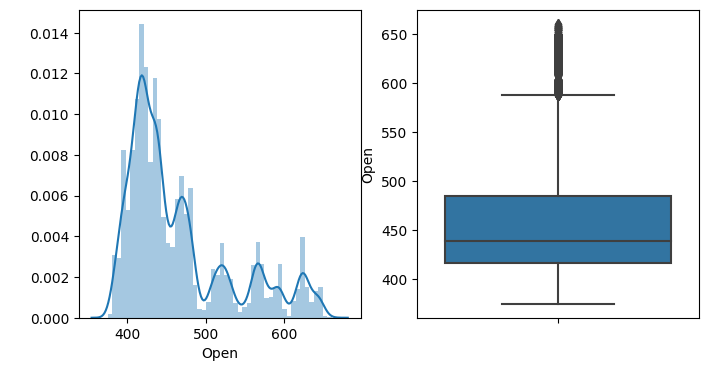

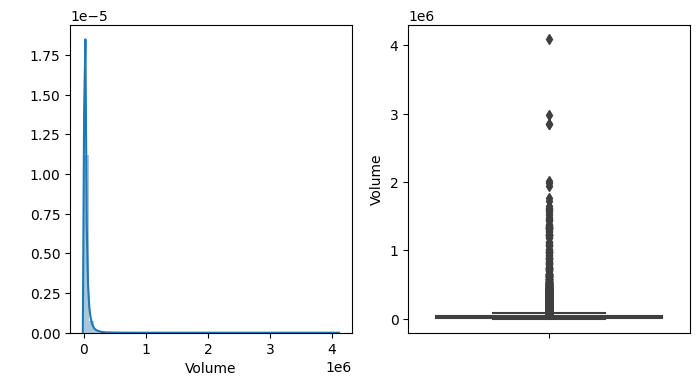

In [96]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(data1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=data1[var])
    fig.set_title('')
    fig.set_ylabel(var)

**Dependent** **Variable**

<ipython-input-97-09f8ca224037>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data1['Close'].dropna())


Text(0, 0.5, 'Volume')

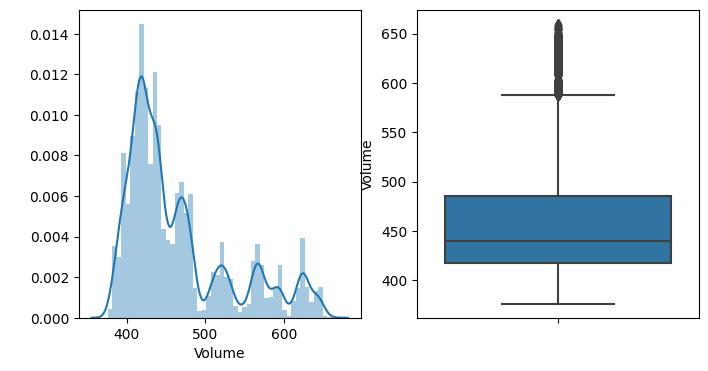

In [97]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
fig = sns.distplot(data1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=data1['Close'])
fig.set_title('')
fig.set_ylabel(var)

**Data** **Transformation**

<ipython-input-98-4a07b468bb87>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(np.log10(data1[var]))
<ipython-input-98-4a07b468bb87>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(np.log10(data1[var]))
<ipython-input-98-4a07b468bb87>:5: UserWarning: 

`distplot` is a deprecated f

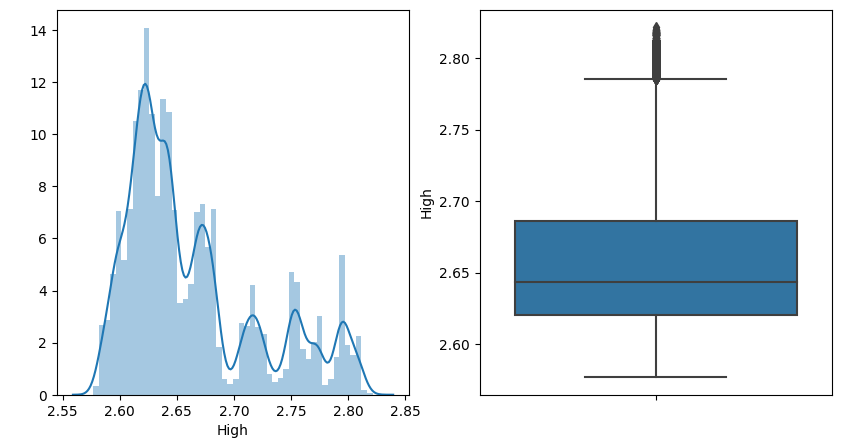

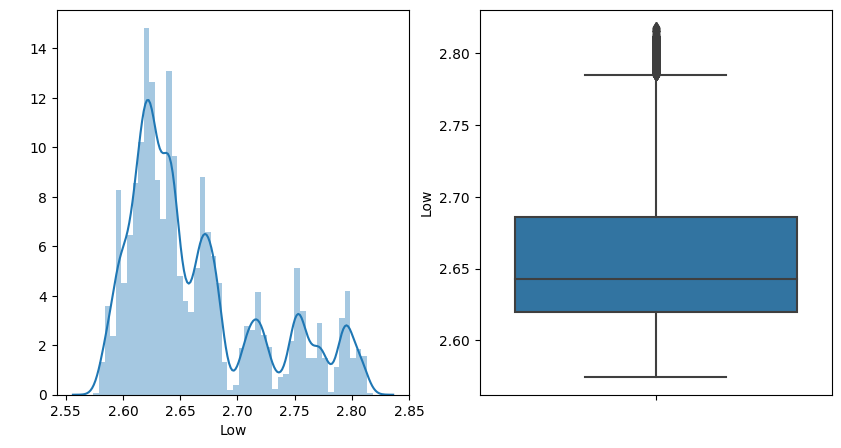

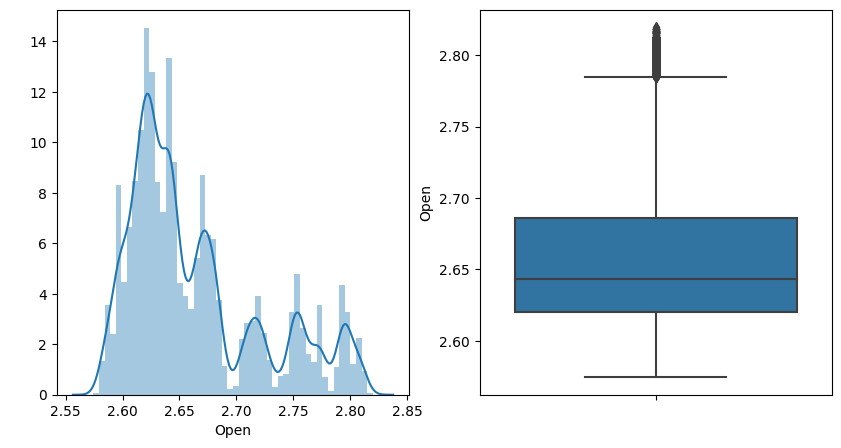

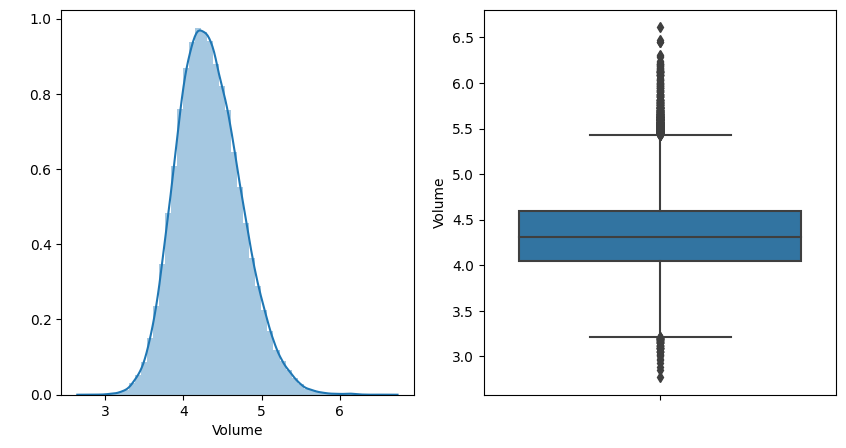

In [98]:
#independent variables
for var in indep_var:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(data1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(data1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

**Bivariate** **Analysis**

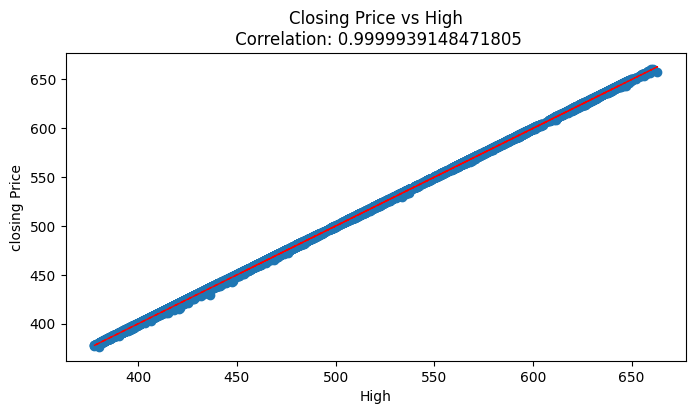

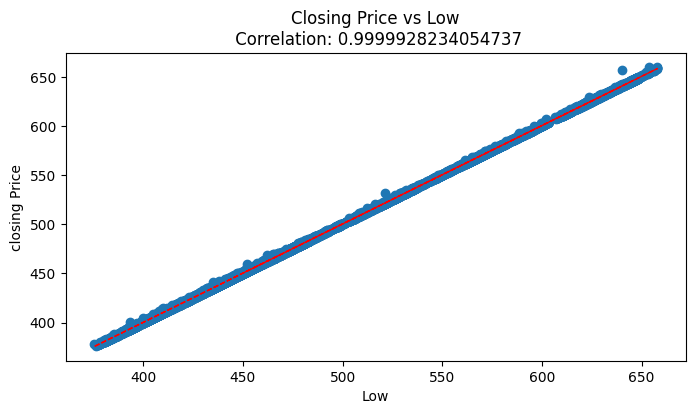

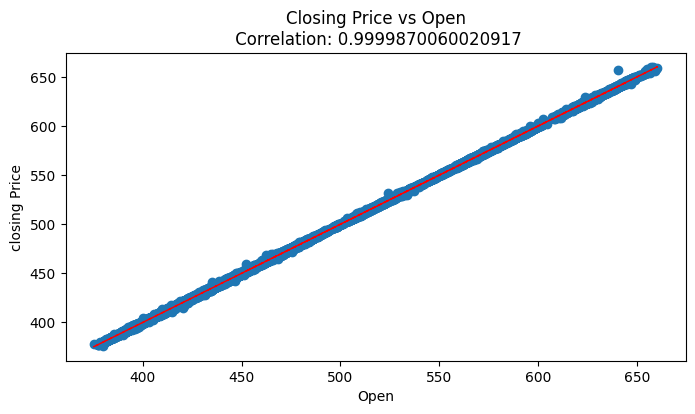

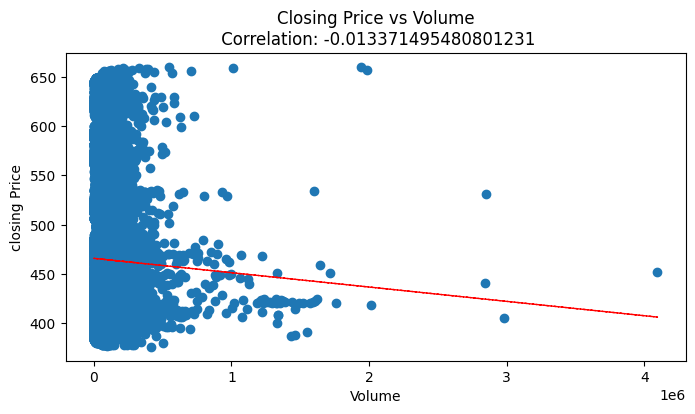

In [99]:
for col in indep_var:
   fig = plt.figure(figsize=(8, 4))
   ax = fig.gca()
   feature = data1[col]
   label = data1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('Closing Price vs ' + col + '\n Correlation: ' + str(correlation))
   z = np.polyfit(data1[col], data1['Close'], 1)
   y_hat = np.poly1d(z)(data1[col])

   plt.plot(data1[col], y_hat, "r--", lw=1)

plt.show()

We can clearly make out that all the independent variables are linearly affecting our dependent variable.

**Correlation**

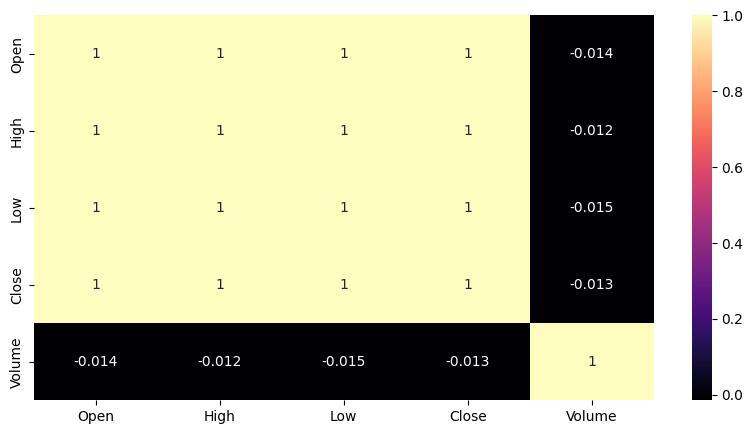

In [100]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(), annot = True, cmap='magma')
plt.show()

**Multicollinearity**

In [101]:
#Multicollinearity
#VIF score

def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [102]:
calc_vif(indep_var)

,variables,VIF
0,High,4.679469e+06
1,Low,4.794203e+06
2,Open,5.400622e+06
3,Volume,2.188141e+00


We have not high VIF scores, so we will perform feature engineering.

**Feature** **Engineering**

We will perform Combine Variables operation.



In [103]:
# Create a new feature: Average Price
data1['Average_Price'] = (data1['High'] + data1['Low'] + data1['Open'] + data1['Volume']) / 4

# Drop the original High, Low, and Open columns
data1 = data1.drop(['High', 'Low', 'Open', 'Volume'], axis=1)

print(data1)

                            Close  Average_Price
Date                                            
2022-08-01 09:15:00+05:30  453.40     74601.7500
2022-08-01 09:16:00+05:30  454.35     43314.9375
2022-08-01 09:17:00+05:30  453.35     46336.0375
2022-08-01 09:18:00+05:30  453.35     45009.4250
2022-08-01 09:19:00+05:30  453.75     26920.5625
...                           ...            ...
2023-07-31 15:25:00+05:30  644.15      5262.4375
2023-07-31 15:26:00+05:30  644.70      6011.0500
2023-07-31 15:27:00+05:30  644.40      6621.6875
2023-07-31 15:28:00+05:30  644.00     17465.4875
2023-07-31 15:29:00+05:30  644.30      5419.9875

[92250 rows x 2 columns]


**Dataframe** **to** **store** **evalation** **metrics**

---
I will store the evaluation metrics for each regression model into this data frame to compare at the end.


In [104]:
#empty data frame creation
i=0
df=pd.DataFrame()

# ***Support*** ***Vector*** ***Regression***

In [105]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error

# # Split the data into features (X) and target (y)
# X = data1[['Average_Price']]
# y = data1['Close']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create an SVR model
# svr_model = SVR(kernel='linear')

# # Train the SVR model
# svr_model.fit(X_train_scaled, y_train)

# # Predict the target variable
# y_pred = svr_model.predict(X_test_scaled)

# #evaluation metrics
# MAE = mean_absolute_error((y_test), (y_pred))
# print("MAE :" ,MAE)

# MSE  = mean_squared_error((y_test), (y_pred))
# print("MSE :" , MSE)

# RMSE = np.sqrt(MSE)
# print("RMSE :" ,RMSE)




# ***Random*** ***Forest*** ***Regression***

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Split the data into features (X) and target (y)
X = data1[['Average_Price']]
y = data1['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict the target variable
y_pred = rf_model.predict(X_test)

# #evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE : 61.3792145123153
MSE : 6473.966391137283
RMSE : 80.46096190785494


In [107]:
#Inserting errors in dataframe
df.loc[i,"Model_Name"]='Random Forest Regression'
df.loc[i,"MAE"]=round(MAE,2)
df.loc[i,"MSE"]=round(MSE,2)
df.loc[i,"RMSE"]=round(RMSE,2)
i+=1

**Visualization**

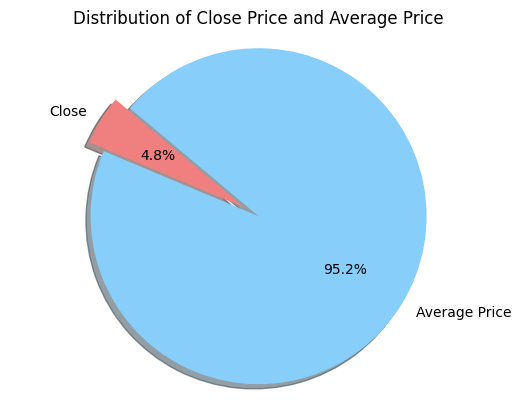

In [108]:
# Create a pie chart
labels = ['Close', 'Average Price']
sizes = [data1['Close'].sum(), data1['Average_Price'].sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the 1st slice (Close)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Close Price and Average Price')

plt.show()

# ***Decision*** ***Tree*** ***Regression***

In [109]:
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict the target variable
y_pred = dt_model.predict(X_test)

# #evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MAE : 69.79705645889791
MSE : 8746.977279475308
RMSE : 93.5252761528952


In [110]:
#Inserting errors in dataframe
df.loc[i,"Model_Name"]='Decision Tree Regression'
df.loc[i,"MAE"]=round(MAE,2)
df.loc[i,"MSE"]=round(MSE,2)
df.loc[i,"RMSE"]=round(RMSE,2)
i+=1
df

,Model_Name,MAE,MSE,RMSE
0,Random Forest Regression,61.38,6473.97,80.46
1,Decision Tree Regression,69.80,8746.98,93.53


**Visualization**

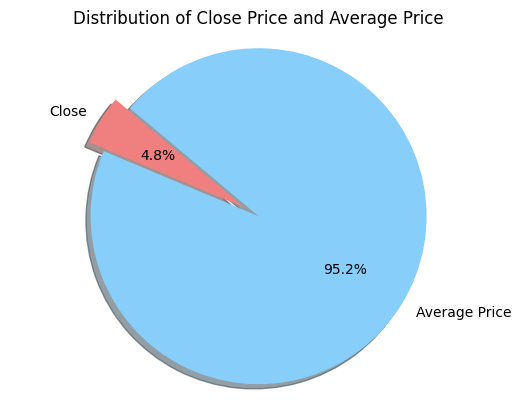

In [111]:
# Create a pie chart
labels = ['Close', 'Average Price']
sizes = [data1['Close'].sum(), data1['Average_Price'].sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the 1st slice (Close)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Close Price and Average Price')

plt.show()

# ***XGBOOST*** ***Regression***




In [112]:
from xgboost import XGBRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict the target variable
y_pred = xgb_model.predict(X_test)

# #evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)




MAE : 53.33354046448912
MSE : 4519.188314190369
RMSE : 67.22490843571576


In [113]:
#Inserting errors in dataframe
df.loc[i,"Model_Name"]='XGBOOST Regression'
df.loc[i,"MAE"]=round(MAE,2)
df.loc[i,"MSE"]=round(MSE,2)
df.loc[i,"RMSE"]=round(RMSE,2)
i+=1
df

,Model_Name,MAE,MSE,RMSE
0,Random Forest Regression,61.38,6473.97,80.46
1,Decision Tree Regression,69.80,8746.98,93.53
2,XGBOOST Regression,53.33,4519.19,67.22


# ***Metrics*** ***Comparison***

In [114]:
#sorting metrics
df.sort_values(by=['MAE'],ascending=True,inplace=True)
df

,Model_Name,MAE,MSE,RMSE
2,XGBOOST Regression,53.33,4519.19,67.22
0,Random Forest Regression,61.38,6473.97,80.46
1,Decision Tree Regression,69.80,8746.98,93.53
